### MODELS IMPLEMENTED

### 1. PRINCIPAL COMPONENT ANALYSIS (PCA)

Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional space while retaining as much variance (information) as possible. It works by finding new axes (principal components) that capture the maximum variance in the dataset.

In [1]:
# load the cleaned dataset
import pandas as pd

file_path = "/content/bank_cleaned_data.csv"
df_cleaned = pd.read_csv(file_path)

df_cleaned.info(), df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          45211 non-null  object
 2   marital      45211 non-null  object
 3   education    45211 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      45211 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     45211 non-null  object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


(None,
    age           job  marital  education default  balance housing loan  \
 0   58    management  married   tertiary      no     2143     yes   no   
 1   44    technician   single  secondary      no       29     yes   no   
 2   33  entrepreneur  married  secondary      no        2     yes  yes   
 3   47   blue-collar  married  secondary      no     1506     yes   no   
 4   33   blue-collar   single  secondary      no        1      no   no   
 
    contact  day_of_week month  duration  campaign  pdays  previous poutcome  \
 0  Unknown            5   may       261         1     -1         0  Unknown   
 1  Unknown            5   may       151         1     -1         0  Unknown   
 2  Unknown            5   may        76         1     -1         0  Unknown   
 3  Unknown            5   may        92         1     -1         0  Unknown   
 4  Unknown            5   may       198         1     -1         0  Unknown   
 
     y  
 0  no  
 1  no  
 2  no  
 3  no  
 4  no  )

Data Selection & Preprocessing


*   Selected only numerical features.

*   Standardized the data using `StandardScaler` to ensure equal weighting of features.

Standardization rescales the features so that they have:

*   Mean = 0
*   Standard Deviation = 1

This prevents features with larger numerical ranges (e.g., `balance` or `duration`) from dominating those with smaller ranges.

In [4]:
from sklearn.preprocessing import StandardScaler

# select only numerical columns for PCA
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df_cleaned[numerical_cols]

# standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# convert back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)

df_scaled.to_csv("df_scaled_pca.csv", index=False)

In [5]:
df_scaled.head()

,age,balance,day_of_week,duration,campaign,pdays,previous
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.25194
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194


The transformed values now represent the number of standard deviations away from the mean, ensuring that all features are on the same scale before performing PCA.

Applying Principal Component Analysis (PCA):

* `n_components=2`: Reduces the dataset to 2 dimensions for visualization.
* `n_components=3`: Reduces the dataset to 3 dimensions for better representation.


In [6]:
import numpy as np
from sklearn.decomposition import PCA

# perform PCA with 2 and 3 components
pca_2 = PCA(n_components=2)
pca_3 = PCA(n_components=3)

df_pca_2 = pca_2.fit_transform(df_scaled)
df_pca_3 = pca_3.fit_transform(df_scaled)

# explained variance ratio
explained_variance_2 = np.sum(pca_2.explained_variance_ratio_) * 100
explained_variance_3 = np.sum(pca_3.explained_variance_ratio_) * 100

# explained variance percentages
explained_variance_2, explained_variance_3

(38.061539631014014, 53.7331979577969)

The results indicate that reducing the dataset to 2 or 3 principal components retains only 38.06% and 53.73% of the total variance, respectively. This suggests that a low-dimensional representation may not adequately preserve the information in the dataset.

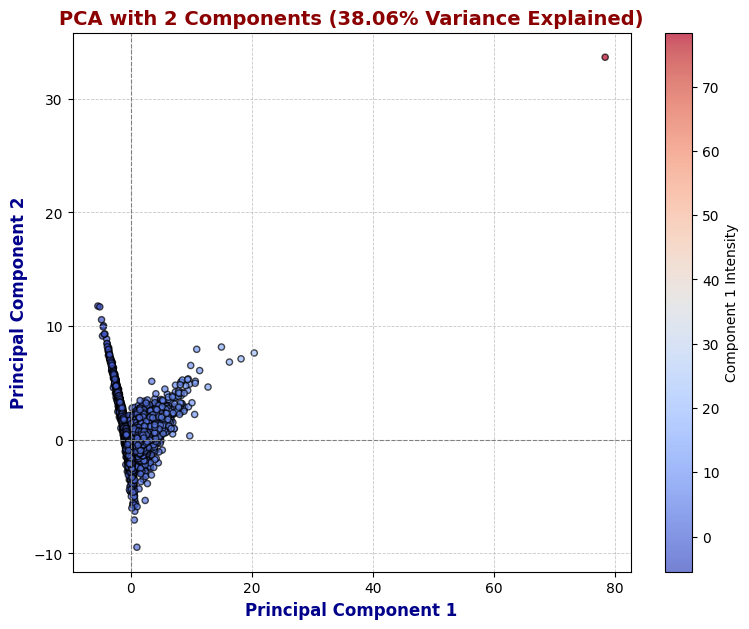

In [7]:
# 2D Plot for PCA
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 7))
plt.scatter(df_pca_2[:, 0], df_pca_2[:, 1], alpha=0.7, c=df_pca_2[:, 0], cmap='coolwarm', edgecolors='k', s=20)
plt.xlabel("Principal Component 1", fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel("Principal Component 2", fontsize=12, fontweight='bold', color='darkblue')
plt.title(f"PCA with 2 Components ({explained_variance_2:.2f}% Variance Explained)", fontsize=14, fontweight='bold', color='darkred')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.7)
plt.colorbar(label="Component 1 Intensity")
plt.show()

The PCA scatter plot with **2 components** shows most data points clustered near the origin, with a few outliers. With only **38.06% variance retained**, this representation captures some structure but loses significant information.

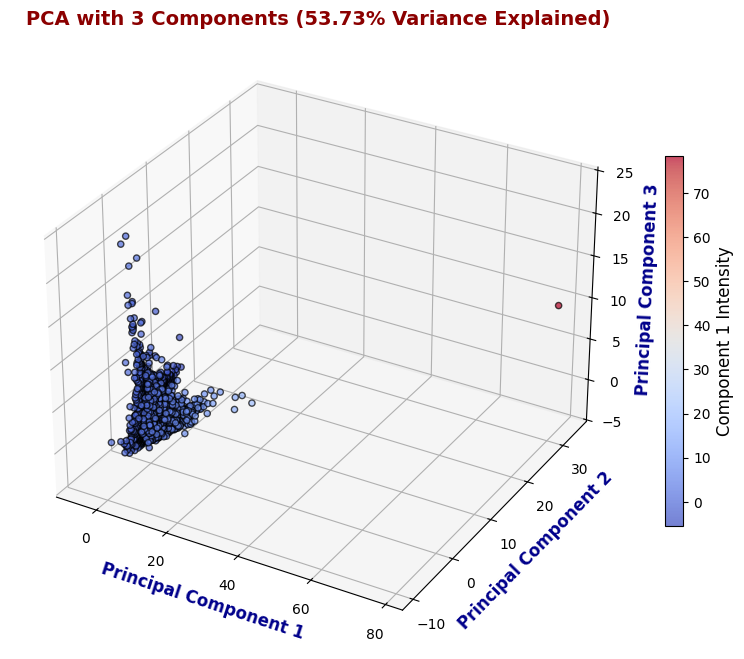

In [8]:
from mpl_toolkits.mplot3d import Axes3D

pca_3 = PCA(n_components=3)
df_pca_3 = pca_3.fit_transform(df_scaled)
explained_variance_3 = np.sum(pca_3.explained_variance_ratio_) * 100

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df_pca_3[:, 0], df_pca_3[:, 1], df_pca_3[:, 2],
                c=df_pca_3[:, 0], cmap='coolwarm', alpha=0.7, s=20, edgecolors='k')

ax.set_xlabel("Principal Component 1", fontsize=12, fontweight='bold', color='darkblue')
ax.set_ylabel("Principal Component 2", fontsize=12, fontweight='bold', color='darkblue')
ax.set_zlabel("Principal Component 3", fontsize=12, fontweight='bold', color='darkblue')
ax.set_title(f"PCA with 3 Components ({explained_variance_3:.2f}% Variance Explained)", fontsize=14, fontweight='bold', color='darkred')

cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=20)
cbar.set_label("Component 1 Intensity", fontsize=12)
plt.show()

The **3D PCA plot** with **3 components** retains **53.73% variance**, offering a better representation than the 2D version. Data points remain densely clustered, with some outliers, indicating that more components may still be needed for a fuller picture.

In [9]:
# perform PCA with all components to find the number needed for 95% variance
pca_full = PCA()
pca_full.fit(df_scaled)

# cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# find the number of components needed for 95% variance
num_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1

# extract the top 3 eigenvalues
top_3_eigenvalues = pca_full.explained_variance_[:3]

num_components_95, top_3_eigenvalues

(7, array([1.50932686, 1.15503984, 1.09704035]))

The analysis shows that **7 principal components** are needed to retain at least **95% of the variance**, ensuring minimal information loss while reducing dimensionality. The **top three eigenvalues** are **1.5093, 1.1550, and 1.0970**, indicating the relative importance of the first three principal components in capturing variance.

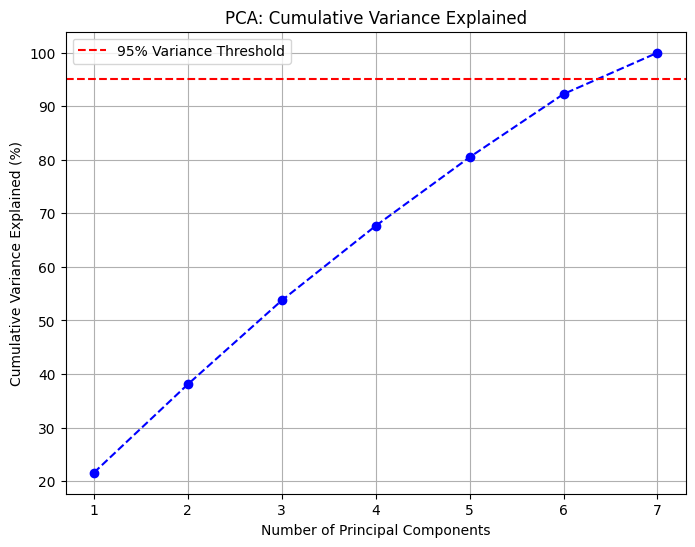

In [10]:
# plot cumulative variance explained
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance * 100, marker='o', linestyle='--', color='b')
plt.axhline(y=95, color='r', linestyle='--', label="95% Variance Threshold")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained (%)")
plt.title("PCA: Cumulative Variance Explained")
plt.legend()
plt.grid(True)
plt.show()

The cumulative variance plot shows that **7 principal components** are required to retain at least **95% of the variance** (marked by the red threshold line). This confirms that reducing the dataset to 7 dimensions preserves most of the original information while significantly reducing complexity.

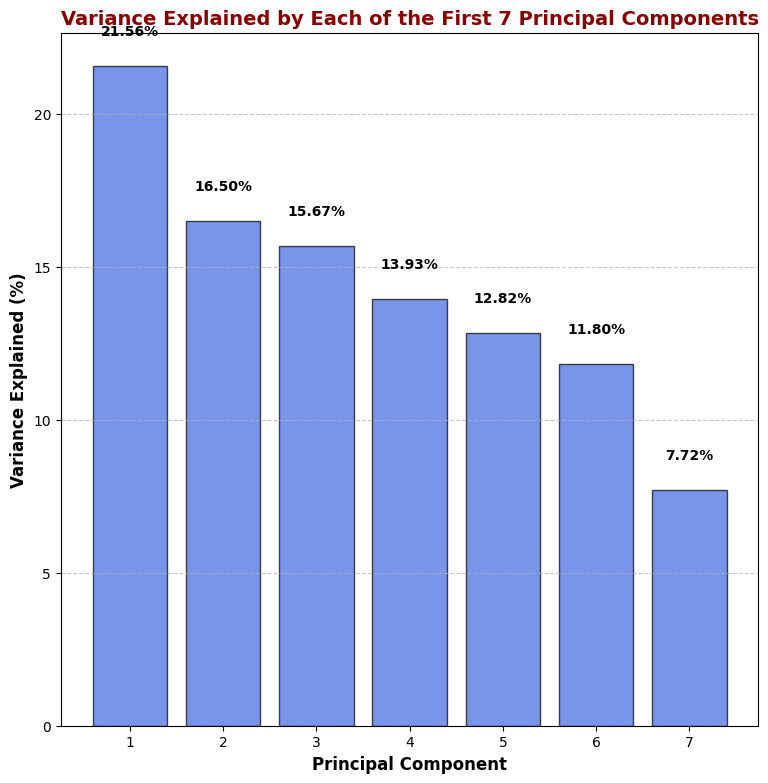

In [11]:
# explained variance for each component
explained_variance = pca_full.explained_variance_ratio_[:7]

# plot explained variance for the first 7 components
plt.figure(figsize=(9, 9))
plt.bar(range(1, 8), explained_variance * 100, color='royalblue', edgecolor='black', alpha=0.7)
plt.xlabel("Principal Component", fontsize=12, fontweight='bold')
plt.ylabel("Variance Explained (%)", fontsize=12, fontweight='bold')
plt.title("Variance Explained by Each of the First 7 Principal Components", fontsize=14, fontweight='bold', color='darkred')

for i, v in enumerate(explained_variance * 100):
    plt.text(i + 1, v + 1, f"{v:.2f}%", ha='center', fontsize=10, fontweight='bold')

plt.xticks(range(1, 8))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This bar plot shows the variance explained by each of the first 7 principal components. The first principal component contributes the most variance (21.56%), followed by the second (16.50%) and third (15.67%). The variance contribution gradually decreases with each additional component.

In [12]:
# apply PCA with 7 components (as determined earlier)
pca_7 = PCA(n_components=7)
df_pca_7 = pca_7.fit_transform(df_scaled)

# convert the transformed PCA data into a DataFrame
df_pca_7 = pd.DataFrame(df_pca_7, columns=[f"PC{i+1}" for i in range(7)])

df_pca_7.to_csv("PCA_transformed_data.csv", index=False)

### PCA Results & Conclusion

The 2D and 3D PCA projections help visualize the dataset, but they retain only 38.06% and 53.73% of the variance, respectively, indicating some information loss. To ensure minimal data distortion, PCA analysis determined that 7 principal components are needed to retain 95% of the variance. This transformation reduces dimensionality while preserving essential information, making the dataset more efficient for modeling. PCA simplifies complex data, enhances interpretability, and optimizes computational performance for further analysis.